In [ ]:
!apt-get install libeccodes-tools
!pip install pdbufr
!pip install cartopy
!pip install pybufrkit
!pip install pillow


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libeccodes-tools is already the newest version (2.24.2-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import pdbufr
df_0030 = pdbufr.read_bufr('drive/MyDrive/2024-02-14/00-30/AMV.bufr', columns="data",flat=True)
df = df_0030
# print(df)
df.T[0:40]

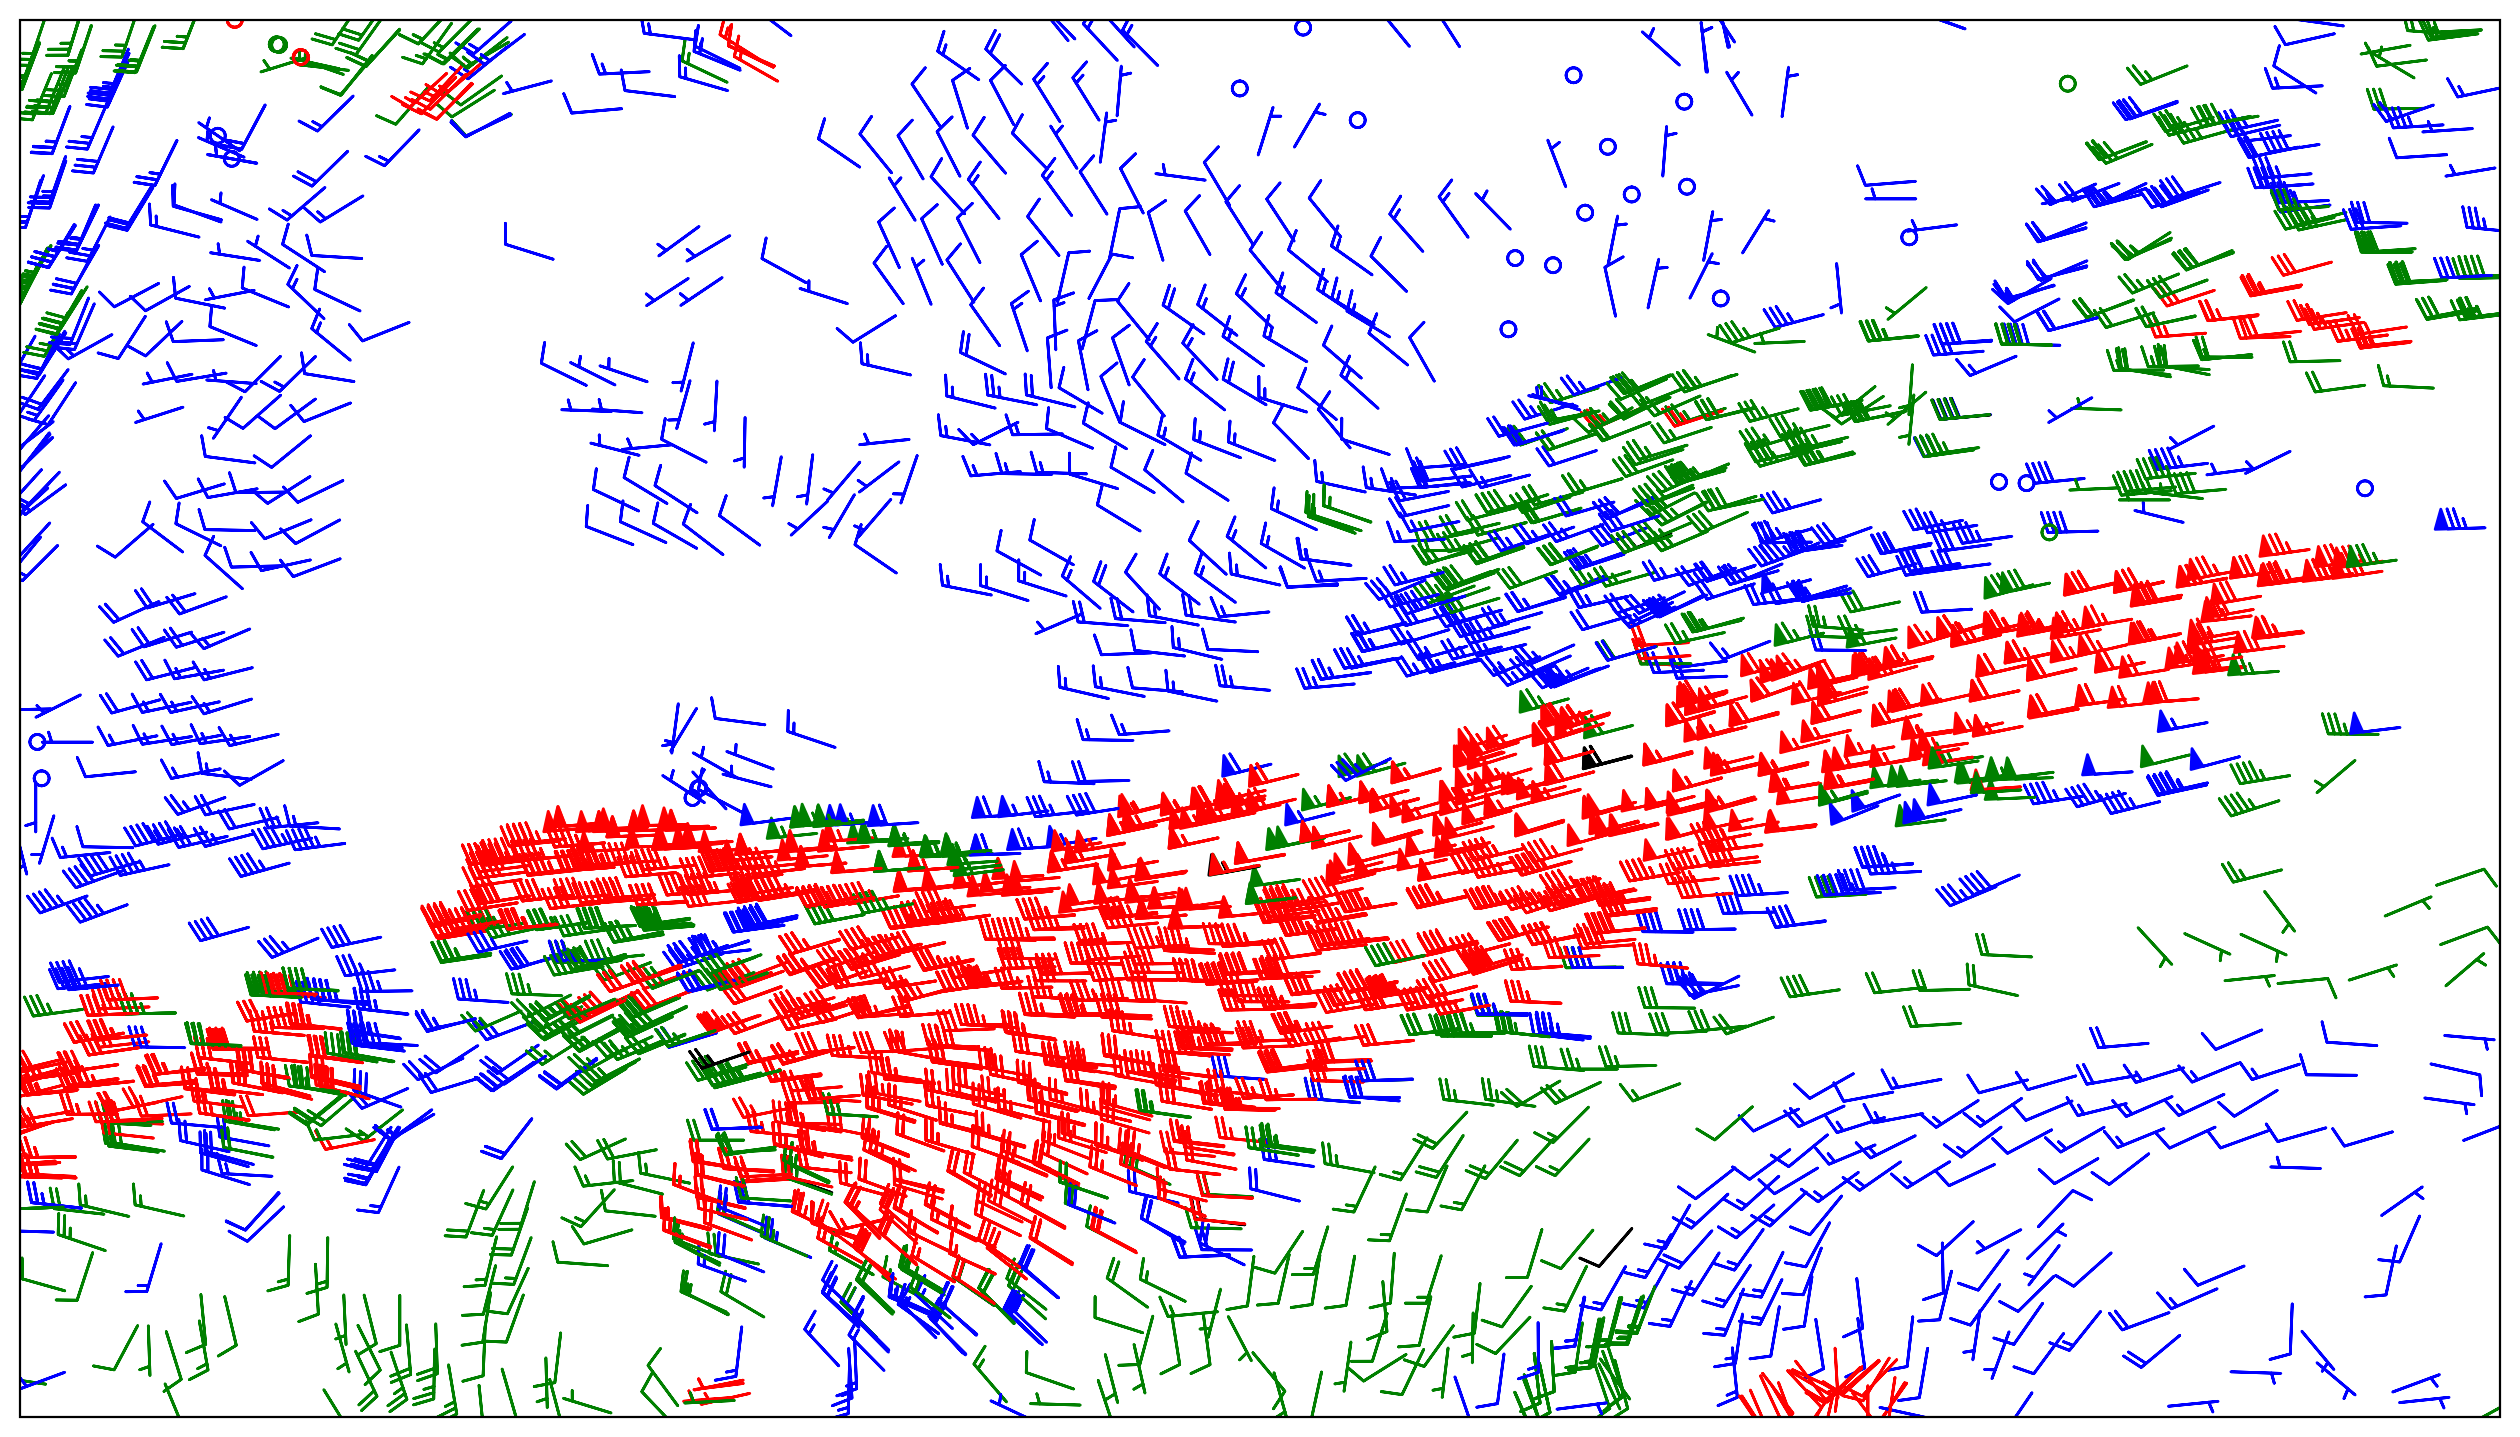

In [ ]:
# UPPER OR LOWER LEVEL WIND
# Note :: uncomment pressure brackets --- GOTO [@UPPER_LEVEL] OR [@LOWER_LEVEL]
import pdbufr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize, ListedColormap

latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

## [@UPPER_LEVEL]
minMaxVal = [10000 , 50000]
pressure_brackets = [
    (10000, 25000),
    (25100, 35000),
    (35100, 50000)
]

## [@LOWER_LEVEL]
# minMaxVal = [40000 , 95000]
# pressure_brackets = [
#     (40000, 59900),
#     (60000, 79900),
#     (80000, 95000)
# ]

filtered_df = df[
    (df['#1#latitude'] >= latBound[0])
    & (df['#1#latitude'] <= latBound[1])
    & (df['#1#longitude'] >= lngBound[0])
    & (df['#1#longitude'] <= lngBound[1])
    & (df['#1#pressure'] >= minMaxVal[0])
    & (df['#1#pressure'] <= minMaxVal[1])
].copy()

pressure_labels = ['red', 'green', 'blue']

filtered_df['#1#pressureColor'] = np.select(
    [((filtered_df['#1#pressure'] >= low) & (filtered_df['#1#pressure'] <= high)) for low, high in pressure_brackets],
    pressure_labels, default='black'
)

# Correct the wind vector calculation
# windu = -df['#1#windSpeed'] * np.sin(np.radians(df['#1#windDirection']))
# windv = -df['#1#windSpeed'] * np.cos(np.radians(df['#1#windDirection']))

# Create a cartopy map with PlateCarree projection
# print(filtered_df['#1#windSpeed'])
fig = plt.figure(figsize=(16, 16), dpi=200)
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

cmap = ListedColormap(pressure_labels)
norm = plt.Normalize(minMaxVal[0], minMaxVal[1])
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# cbar = plt.colorbar(sm, ax=ax, label='Pressure')
# cbar.ax.tick_params(labelsize=12)

barbs = ax.barbs(filtered_df['#1#longitude'],
                  filtered_df['#1#latitude'],
                  filtered_df['#1#u'],
                  filtered_df['#1#v'],
                  color=filtered_df['#1#pressureColor'],
                  pivot='middle',
                  transform=ccrs.PlateCarree(),
                  length=6)  # Increase the resolution of wind barbs

# Plot wind barbs with different colors based on pressure brackets
# barbs = ax.barbs(filtered_df['#1#longitude'], filtered_df['#1#latitude'], filtered_df['#1#u'] ,filtered_df['#1#v'], color=filtered_df['#1#pressureColor'], pivot='middle', transform=ccrs.PlateCarree() , length=6)
# Add coastlines and other features to the map
# ax.coastlines()
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
fig.patch.set_alpha(0)  # Set the figure background to be transparent

# Save the figure as a WebP image with transparent background
fig.savefig("output.webp", transparent=True ,format='webp', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


<ipython-input-64-b884894cd8f9>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['#1#pressureColor'] = np.select(


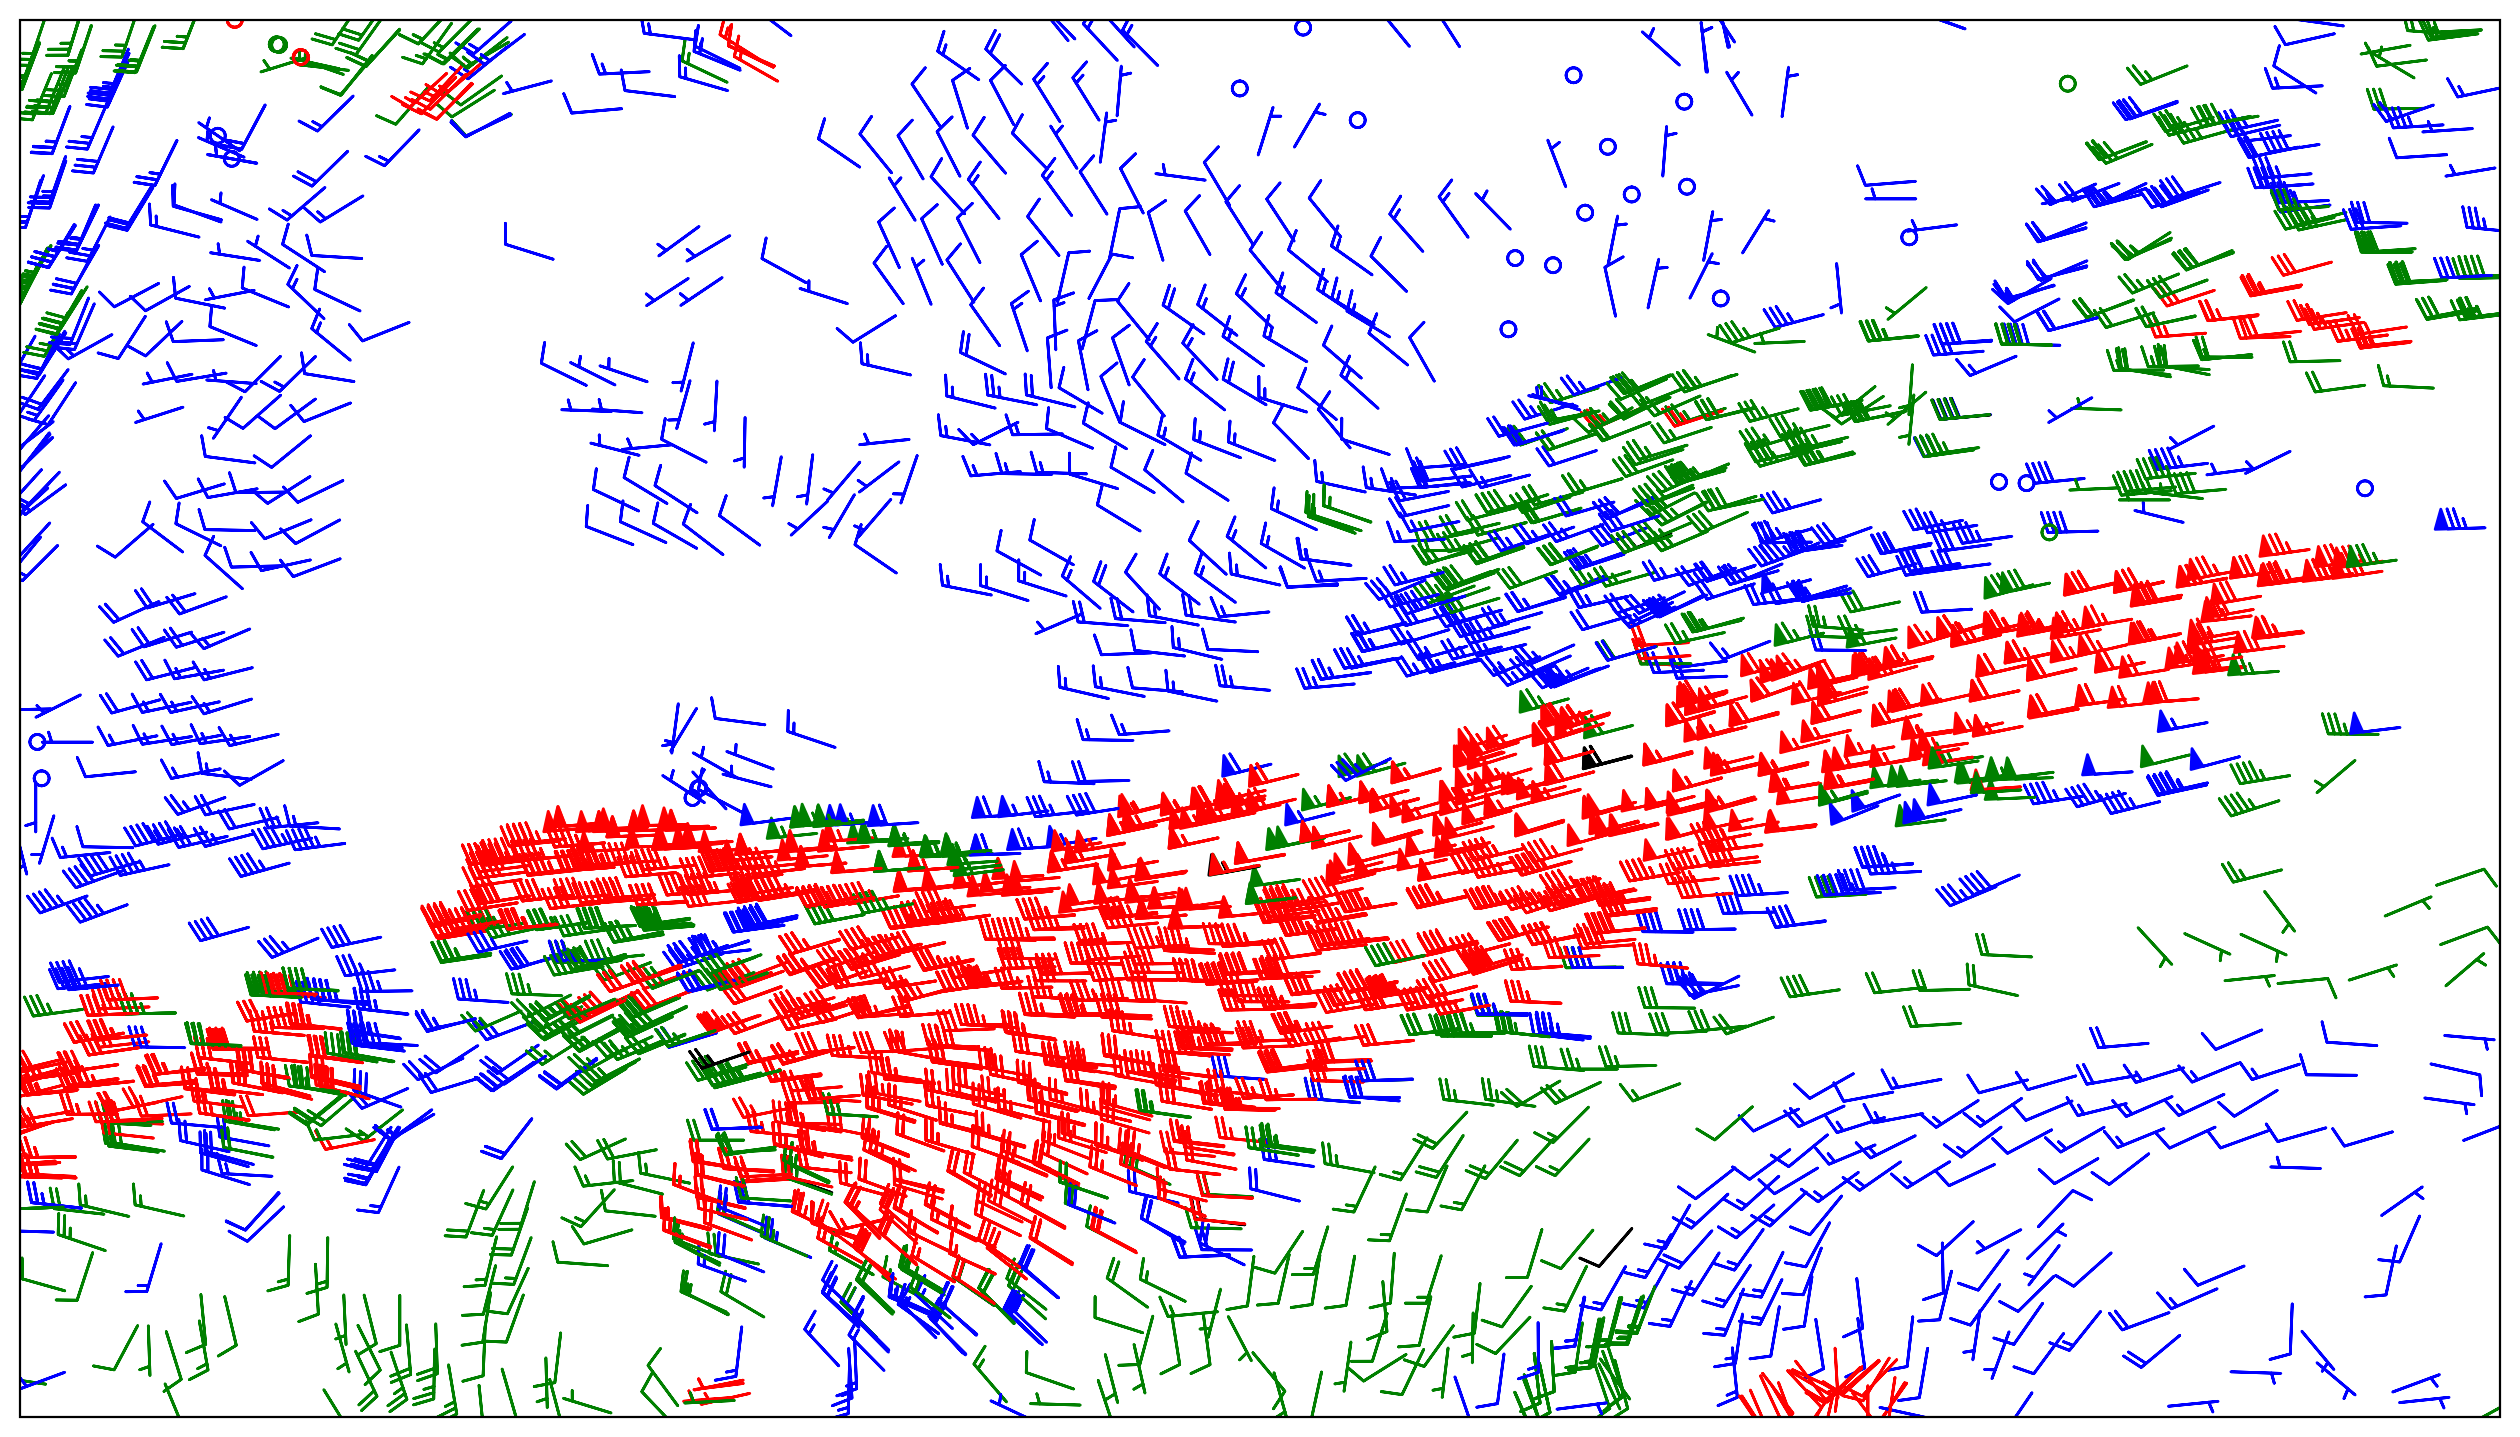

In [ ]:
# UPPER OR LOWER LEVEL WIND
# Note :: uncomment pressure brackets --- GOTO [@UPPER_LEVEL] OR [@LOWER_LEVEL]
import pdbufr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize, ListedColormap

latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

## [@UPPER_LEVEL]
minMaxVal = [10000 , 50000]
pressure_brackets = [
    (10000, 25000),
    (25100, 35000),
    (35100, 50000)
]

## [@LOWER_LEVEL]
# minMaxVal = [40000 , 95000]
# pressure_brackets = [
#     (40000, 59900),
#     (60000, 79900),
#     (80000, 95000)
# ]

filtered_df = df[
    (df['#1#latitude'] >= latBound[0])
    & (df['#1#latitude'] <= latBound[1])
    & (df['#1#longitude'] >= lngBound[0])
    & (df['#1#longitude'] <= lngBound[1])
    & (df['#1#pressure'] >= minMaxVal[0])
    & (df['#1#pressure'] <= minMaxVal[1])
]

pressure_labels = ['red', 'green', 'blue']

filtered_df['#1#pressureColor'] = np.select(
    [((filtered_df['#1#pressure'] >= low) & (filtered_df['#1#pressure'] <= high)) for low, high in pressure_brackets],
    pressure_labels, default='black'
)

# Correct the wind vector calculation
# windu = -df['#1#windSpeed'] * np.sin(np.radians(df['#1#windDirection']))
# windv = -df['#1#windSpeed'] * np.cos(np.radians(df['#1#windDirection']))

# Create a cartopy map with PlateCarree projection
# print(filtered_df['#1#windSpeed'])
fig = plt.figure(figsize=(16, 16), dpi=200)
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

# cmap = ListedColormap(pressure_labels)
# norm = plt.Normalize(minMaxVal[0], minMaxVal[1])
# sm = ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])

barbs = ax.barbs(filtered_df['#1#longitude'],
                  filtered_df['#1#latitude'],
                  filtered_df['#1#u'],
                  filtered_df['#1#v'],
                  color=filtered_df['#1#pressureColor'],
                  pivot='middle',
                  transform=ccrs.PlateCarree(),
                  length=6)  # Increase the resolution of wind barbs
fig.patch.set_alpha(0)  # Set the figure background to be transparent

# Save the figure as a WebP image with transparent background
fig.savefig("output.webp", transparent=True ,format='webp', dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()


In [ ]:
import altair as alt
chart = alt.Chart(df).mark_point().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='windDirection:Q',
    tooltip=['#1#latitude', '#1#longitude', '#1#windDirection', '#1#windSpeed', '#1#airTemperature']
).properties(width=600,height=400)
# chart.save('chart.html')
chart

In [ ]:
# ========= TEMP CODE ====================

In [ ]:
!pip install cfgrib matplotlib numpy

In [ ]:
!pip install pybufr-ecmwf

In [ ]:
# =========== Background transparent Webp ====================

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


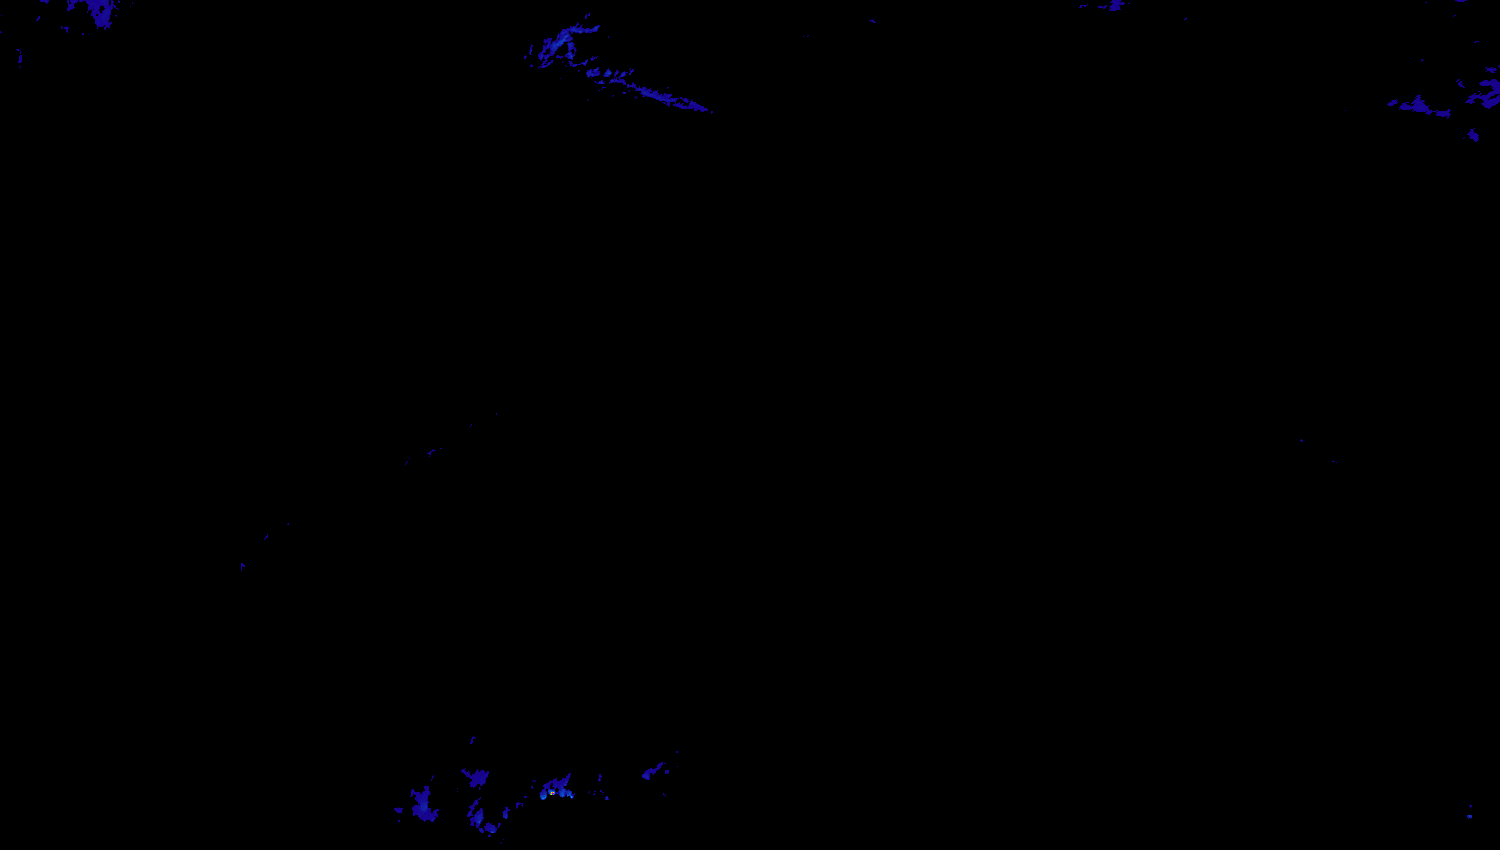

In [ ]:
!pip install opencv-python
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Image file path
image_path = '/content/drive/MyDrive/CurrentWG/Picture_2_Rain_fall_estimate_using_IR_imagery_WG.bmp'

# Load an image from file
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:
    # Display the image
    cv2_imshow(image)
else:
    print("Failed to load image.")

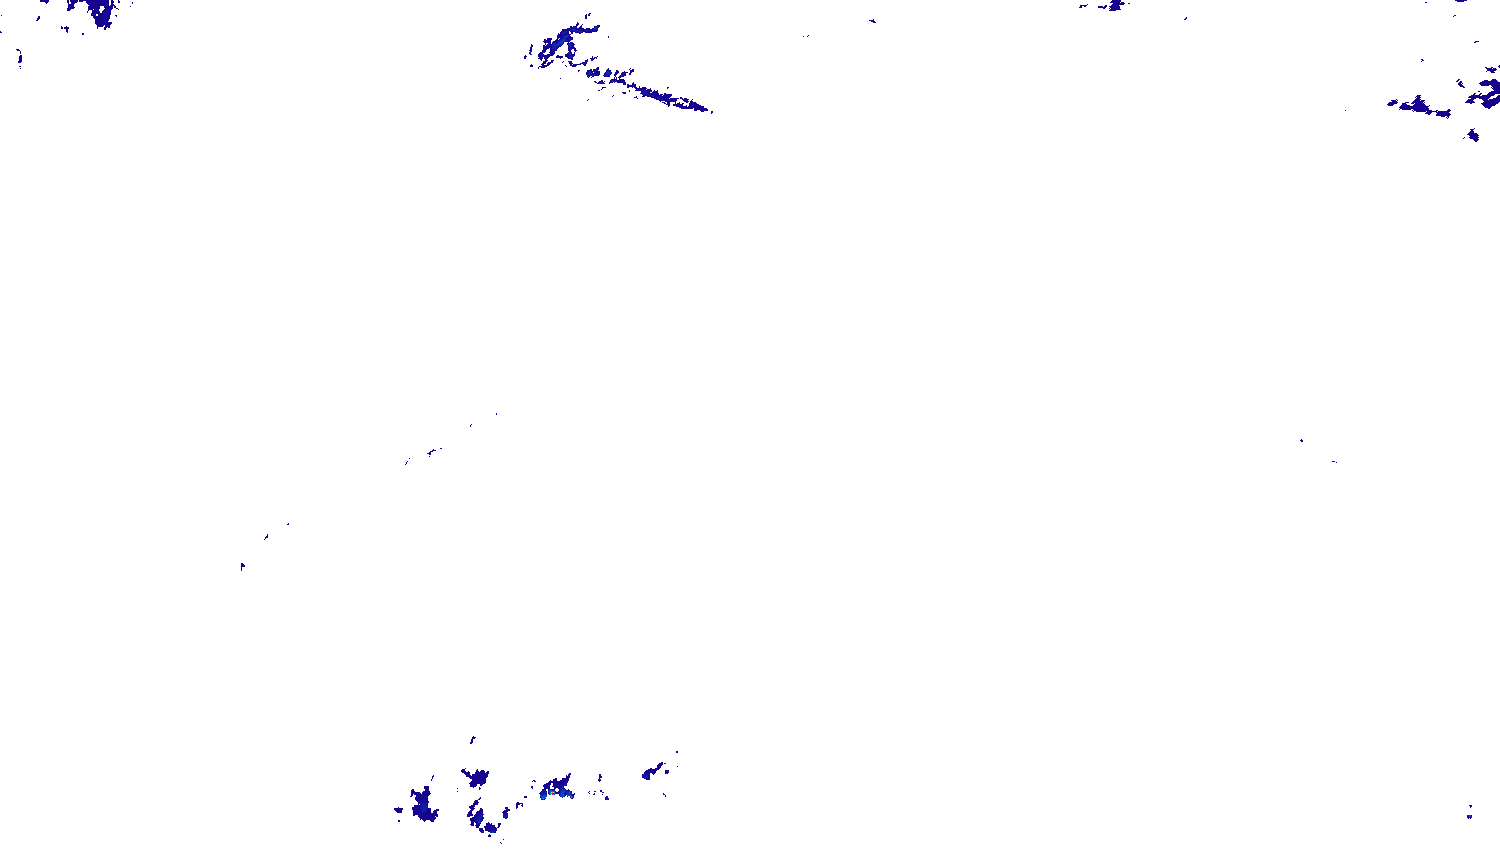

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

# Image file path
image_path = '/content/drive/MyDrive/CurrentWG/Picture_2_Rain_fall_estimate_using_IR_imagery_WG.bmp'

# Load the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:
    # Convert the image to RGBA (add alpha channel)
    image_rgba = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

    # Extract the alpha channel
    b, g, r, a = cv2.split(image_rgba)

    # Set the alpha channel to full transparency for black pixels
    mask = (image[:, :, 0] == 0) & (image[:, :, 1] == 0) & (image[:, :, 2] == 0)
    a[mask] = 0

    # Merge the channels back together
    image_with_transparent_bg = cv2.merge((b, g, r, a))

    # Display the image with transparent background
    cv2_imshow(image_with_transparent_bg)
else:
    print("Failed to load image.")

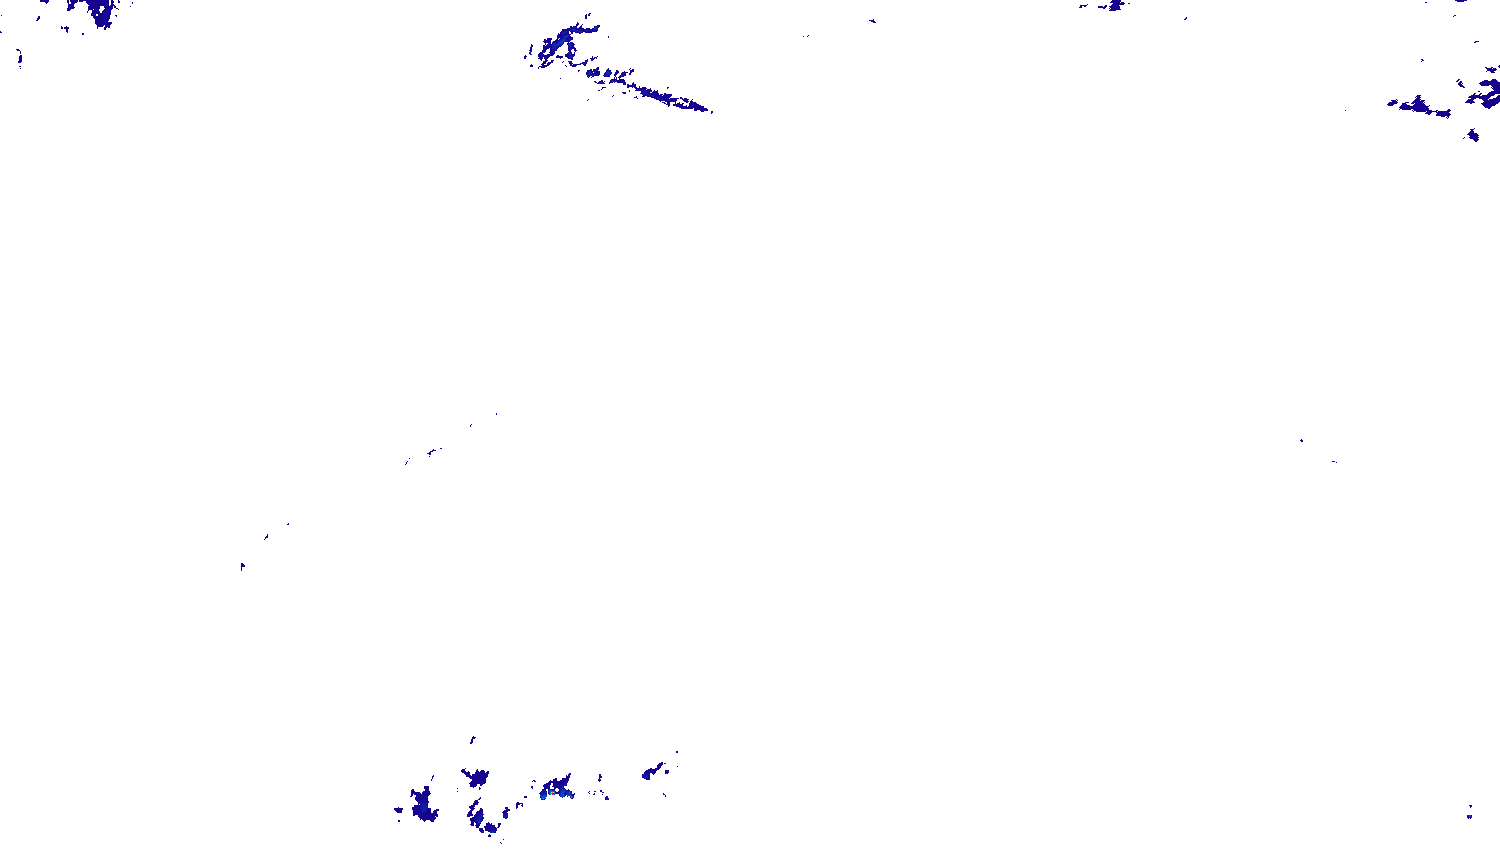

Image saved successfully.


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

# Image file path
image_path = '/content/drive/MyDrive/CurrentWG/Picture_2_Rain_fall_estimate_using_IR_imagery_WG.bmp'
output_path = '/content/drive/MyDrive/CurrentWG/Picture_2_Rain_fall_estimate_using_IR_imagery_WG_TP.webp'

# Load the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:
    # Convert the image to RGBA (add alpha channel)
    image_rgba = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

    # Extract the alpha channel
    b, g, r, a = cv2.split(image_rgba)

    # Set the alpha channel to full transparency for black pixels
    mask = (image[:, :, 0] == 0) & (image[:, :, 1] == 0) & (image[:, :, 2] == 0)
    a[mask] = 0

    # Merge the channels back together
    image_with_transparent_bg = cv2.merge((b, g, r, a))

    # Save the image with transparent background
    cv2.imwrite(output_path, image_with_transparent_bg)

    # Display the image with transparent background
    cv2_imshow(image_with_transparent_bg)

    print("Image saved successfully.")
else:
    print("Failed to load image.")

Its working good i also checked this image by downloading and uploading the image on server1

Picture_2_Rain_fall_estimate_using_IR_imagery_WG [08-00].webp

D:\server1\Archive\2024-02-22


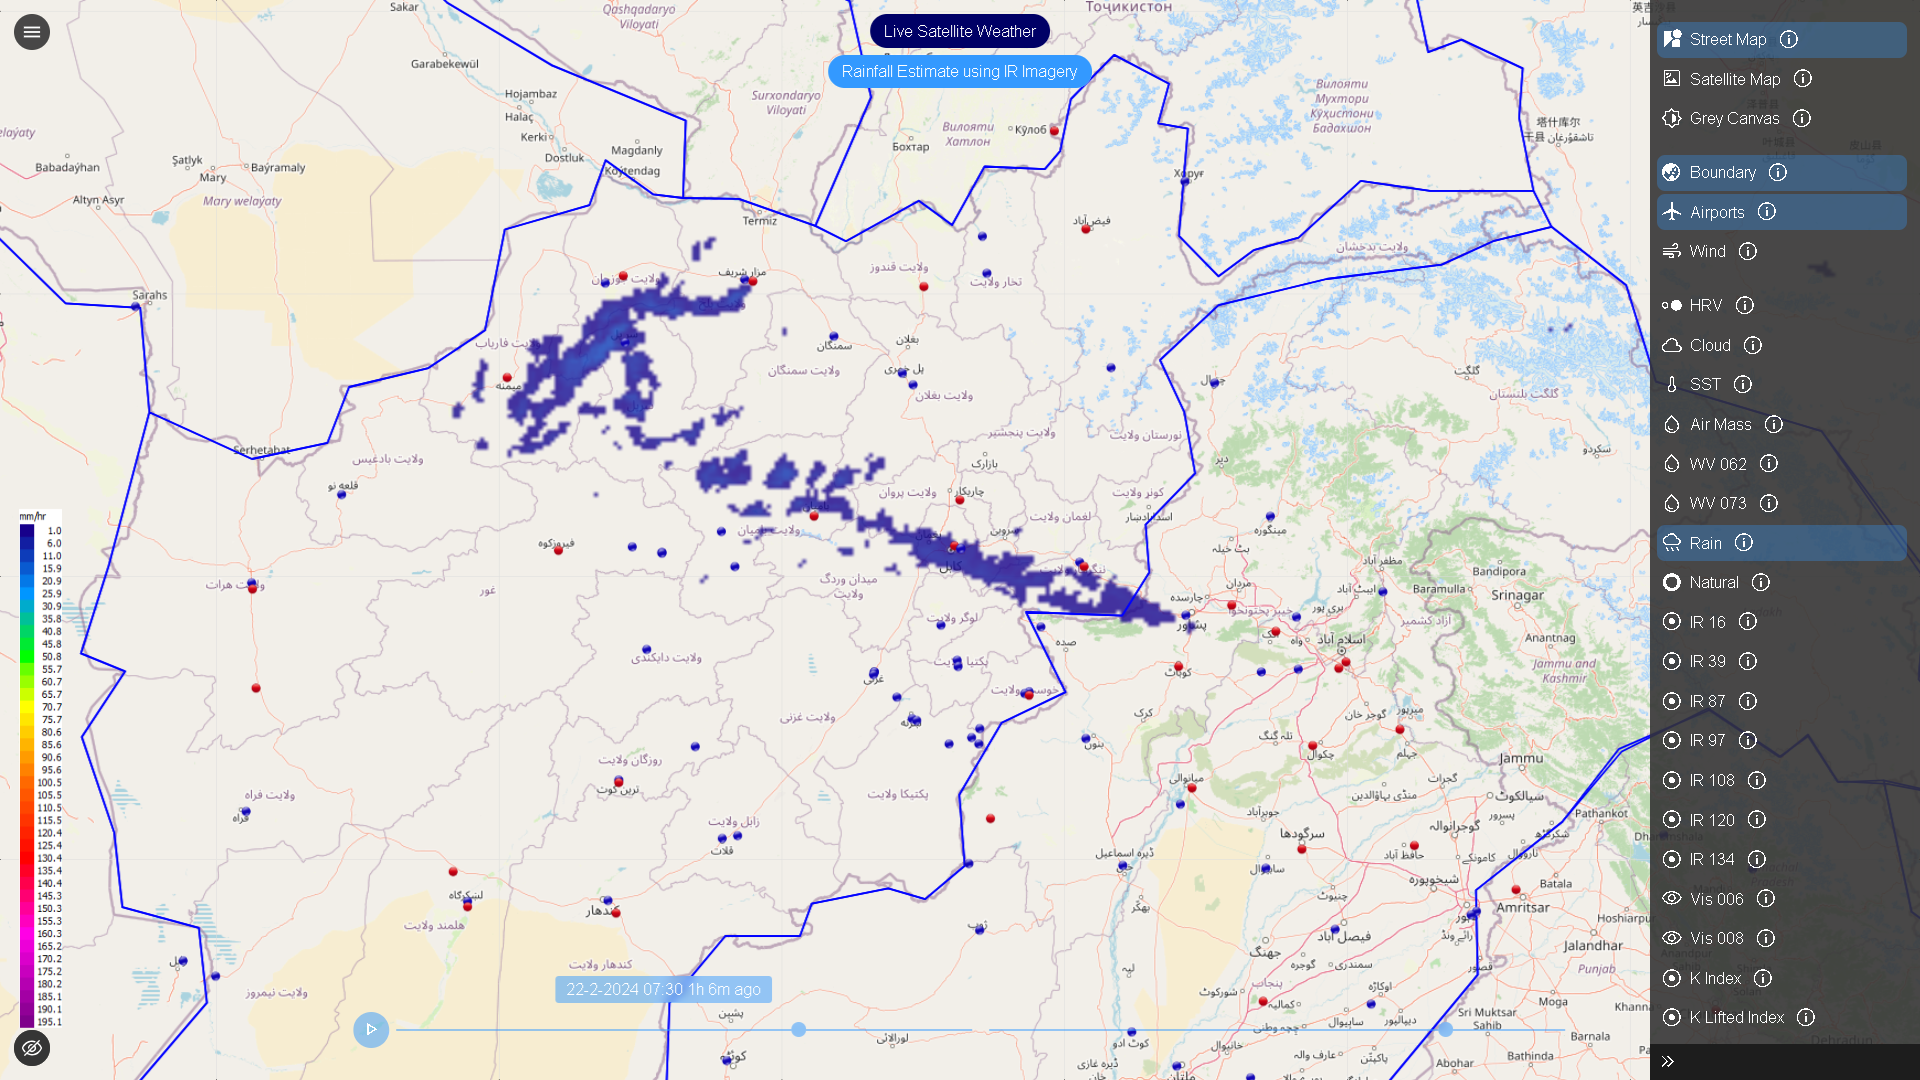

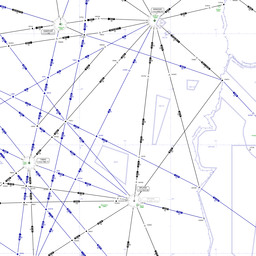

Original image.shape:  (256, 256, 3)


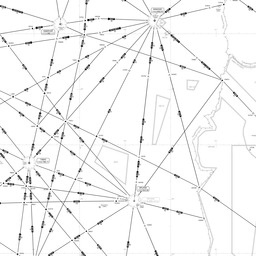

image_8bit.shape:  (256, 256)


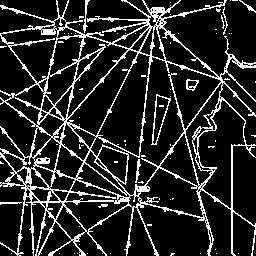

mask.shape:  (256, 256, 3)


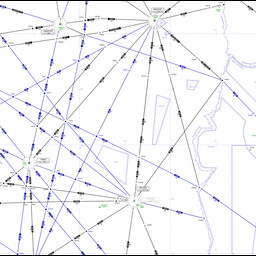

image_with_transparent_bg.shape:  (256, 256, 4)
Image saved successfully.


In [48]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

# Image file path
image_path = '/content/drive/MyDrive/25.jpg'
output_path = '25.webp'

# Load the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:

# Convert the image to 8-bit
    cv2_imshow(image)
    print("Original image.shape: ", image.shape)

    image_8bit = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(image_8bit)
    print("image_8bit.shape: ", image_8bit.shape)

    # Threshold the image to create a binary mask
    _, mask = cv2.threshold(image_8bit, 240, 255, cv2.THRESH_BINARY)

    # Invert the mask
    mask = cv2.bitwise_not(mask)

    # Convert the mask to 3 channels
    mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    cv2_imshow(mask)
    print("mask.shape: ", mask.shape)

    # Convert the image to RGBA (add alpha channel)
    image_rgba = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

    # Extract the alpha channel
    b, g, r, a = cv2.split(image_rgba)

    # Merge the channels back together
    image_with_transparent_bg = cv2.merge((b, g, r, a))

    # Save the image with transparent background
    cv2.imwrite(output_path, image_with_transparent_bg)

    # Display the image with transparent background
    cv2_imshow(image_with_transparent_bg)
    print("image_with_transparent_bg.shape: ", image_with_transparent_bg.shape)

    print("Image saved successfully.")
else:
    print("Failed to load image.")

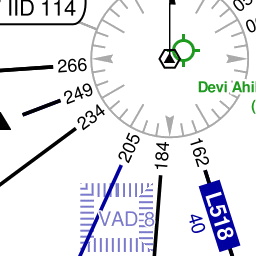

In [50]:
# For single Background Color transparent
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

# Mount Google Drive (if needed)
# drive.mount('/content/drive')

# Image file paths
image_path = '/content/drive/MyDrive/25.jpg'
output_path = '25.webp'

# Load the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:

  # Convert the image to 8-bit grayscale
  image_8bit = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Threshold the image to create a binary mask
  _, mask = cv2.threshold(image_8bit, 240, 255, cv2.THRESH_BINARY)

  # Invert the mask
  mask = cv2.bitwise_not(mask)

  # Make the masked region transparent
  transparent_image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)  # Add alpha channel
  transparent_image[:, :, 3] = mask  # Set alpha channel values based on mask

  # Save the transparent image
  cv2.imwrite(output_path, transparent_image)

  # Display the transparent image (if in a compatible environment)
  cv2_imshow(transparent_image)



Mask for color  (212, 230, 230)


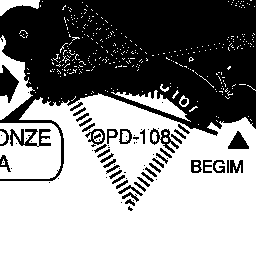

Mask for color  (255, 255, 255)


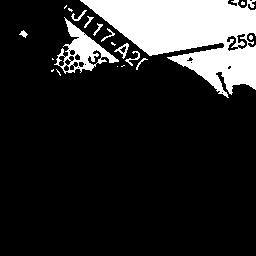

Original 


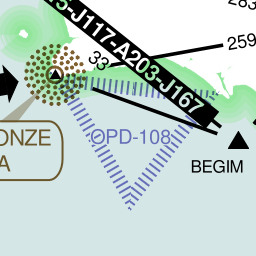

Combined Mask 


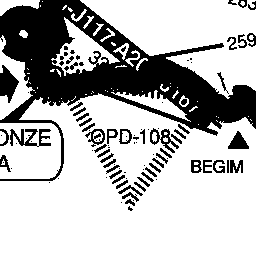

Final 


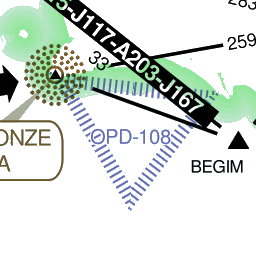

In [85]:
# For multiple Color transparent
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

# Mount Google Drive (if needed)
# drive.mount('/content/drive')

# Image file paths
image_path = '/content/drive/MyDrive/329.jpg'
output_path = '329.webp'
target_color = (212, 230, 230)
target_color1 = (255, 255, 255)

# Define the target ocean color (BGR) with 40% tolerance range
tolerance = 0.15  # Adjust this value for desired tolerance (0 to 1)
target_color_lower = np.array([target_color[0] * (1 - tolerance), target_color[1] * (1 - tolerance), target_color[2] * (1 - tolerance)])
target_color_upper = np.array([target_color[0] * (1 + tolerance), target_color[1] * (1 + tolerance), target_color[2] * (1 + tolerance)])

tolerance1 = 0.05
target_color1_lower = np.array([target_color1[0] * (1 - tolerance1), target_color1[1] * (1 - tolerance1), target_color1[2] * (1 - tolerance1)])
target_color1_upper = np.array([target_color1[0] * (1 + tolerance1), target_color1[1] * (1 + tolerance1), target_color1[2] * (1 + tolerance1)])

# Load the image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is not None:

  # Convert the image to BGR (in case it's loaded in a different format)
  image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

  # Create a mask to select the ocean color with tolerance
  mask1 = cv2.inRange(image, target_color_lower, target_color_upper)
  mask2 = cv2.inRange(image, target_color1_lower, target_color1_upper)

  print('Original ')
  cv2_imshow(image)
  print('Mask1 ')
  cv2_imshow(mask1)
  print('Mask2 ')
  cv2_imshow(mask2)

  # Combine masks (union)
  combined_mask = cv2.bitwise_or(mask1, mask2)

  print('combined_mask ')
  cv2_imshow(combined_mask)
  # Invert the mask
  combined_mask = cv2.bitwise_not(combined_mask)

  # Invert the mask for transparent replacement
  mask = cv2.bitwise_not(mask)

  # Make the masked region transparent
  transparent_image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
  transparent_image[:, :, 3] = combined_mask

  # Save the transparent image
  cv2.imwrite(output_path, transparent_image)
  print('Final ')
  # Display the transparent image (if in a compatible environment)
  cv2_imshow(transparent_image)

In [ ]:
# For multiple Color transparent
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

# Mount Google Drive (if needed)
# drive.mount('/content/drive')

# Image file paths
image_path = '/content/drive/MyDrive/329.jpg'
output_path = '329.webp'

# Define target colors as an array of objects with tolerance
target_colors = [
    {'color': (212, 230, 230), 'tolerance': 0.15},
    {'color': (255, 255, 255), 'tolerance': 0.05},
]

# Load the image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is not None:

  # Convert the image to BGR (in case it's loaded in a different format)
  image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

  # Create masks for each target color
  masks = []
  for color_obj in target_colors:
    target_color = color_obj['color']
    tolerance = color_obj['tolerance']
    target_color_lower = np.array([target_color[0] * (1 - tolerance), target_color[1] * (1 - tolerance), target_color[2] * (1 - tolerance)])
    target_color_upper = np.array([target_color[0] * (1 + tolerance), target_color[1] * (1 + tolerance), target_color[2] * (1 + tolerance)])
    mask = cv2.inRange(image, target_color_lower, target_color_upper)
    print('Mask for color ',target_color)
    cv2_imshow(mask)
    masks.append(mask)

  # Combine masks (union)
  combined_mask = masks[0]  # Start with the first mask
  for mask in masks[1:]:    # Combine remaining masks with bitwise OR
    combined_mask = cv2.bitwise_or(combined_mask, mask)

  print('Original ')
  cv2_imshow(image)
  print('Combined Mask ')
  cv2_imshow(combined_mask)

  # Invert the mask
  combined_mask = cv2.bitwise_not(combined_mask)

  # Make the masked region transparent
  transparent_image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
  transparent_image[:, :, 3] = combined_mask

  # Save the transparent image
  cv2.imwrite(output_path, transparent_image)
  print('Final ')
  # Display the transparent image (if in a compatible environment)
  cv2_imshow(transparent_image)
